In [54]:
# Check for missing values
missing_values = X.isnull().sum()
print(missing_values)


timestamp     0
x             0
y             0
body_roll     0
body_pitch    0
body_yaw      0
head_roll     0
head_pitch    0
head_yaw      0
other_oid     0
other_x       0
other_y       0
dtype: int64


In [52]:
# Check for missing values in the DataFrame
print(X.isnull())  # Check for missing values in each cell
print(X.isnull().sum())  # Check the total number of missing values per column
print(X.isnull().any())  # Check if any missing values exist in each column
print(X.isnull().any().any())  # Check if any missing values exist in the entire DataFrame


      GameID    Age  HoursPerWeek  TotalHours    APM  SelectByHotkeys  \
0      False  False         False       False  False            False   
1      False  False         False       False  False            False   
2      False  False         False       False  False            False   
3      False  False         False       False  False            False   
4      False  False         False       False  False            False   
...      ...    ...           ...         ...    ...              ...   
3335   False  False         False       False  False            False   
3336   False  False         False       False  False            False   
3337   False  False         False       False  False            False   
3338   False  False         False       False  False            False   
3339   False  False         False       False  False            False   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0               False          False           

In [12]:
data.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.640310,5.405751e+06,None,None,None,None,None,None,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.792078,5.405751e+06,None,None,None,None,None,None,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.943847,5.405751e+06,None,None,None,None,None,None,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.095616,5.405751e+06,None,None,None,None,None,None,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.256935,5.405751e+06,None,None,None,None,None,None,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


In [14]:
print(X.shape, y.shape)

(4759, 13) (4759,)


In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the tracks.csv file
data = pd.read_csv('tracks.csv')

# Select the desired features
features = ['timestamp', 'x', 'y', 'body_roll', 'body_pitch', 'body_yaw', 'head_roll', 'head_pitch', 'head_yaw', 'other_oid', 'other_x', 'other_y']
X = data[features]
y = data['x']  # Target variable - predicting the future x position

# Preprocess the data
# Handle missing values
X = X.replace('None', np.nan)

# Convert list values to numerical representation
X['other_oid'] = X['other_oid'].apply(lambda x: len(eval(x)) if isinstance(x, str) else x)
X['other_x'] = X['other_x'].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) else x)
X['other_y'] = X['other_y'].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) else x)

# Handle missing values by filling with appropriate values
X = X.fillna(X.mean())

# Check and handle NaN values
print(X.isnull().sum())

# Check and handle finite values for numeric columns
numeric_columns = X.select_dtypes(include=np.number).columns
print(np.isfinite(X[numeric_columns]).sum())

# Replace NaN or infinite values with finite values
X = X.fillna(-9999)
X = X.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Initialize the Random Forest regressor
rf = RandomForestRegressor()
# Fit the model to calculate feature importances
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature rankings
print(feature_importances)


C:\Users\Dell\AppData\Local\Temp\ipykernel_15984\529002085.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(X.mean())


timestamp        0
x                0
y                0
body_roll     2698
body_pitch    2698
body_yaw      2698
head_roll     2698
head_pitch    2698
head_yaw      2698
other_oid        0
other_x          0
other_y          0
dtype: int64
timestamp    4759
x            4759
y            4759
other_oid    4759
other_x      4759
other_y      4759
dtype: int64
       Feature    Importance
1            x  9.662861e-01
0    timestamp  1.909397e-02
2            y  7.005582e-03
11     other_y  5.020993e-03
10     other_x  2.591874e-03
9    other_oid  8.835853e-07
5     body_yaw  1.487071e-07
4   body_pitch  1.433478e-07
8     head_yaw  1.387879e-07
7   head_pitch  5.799743e-08
3    body_roll  4.104172e-08
6    head_roll  4.061732e-08


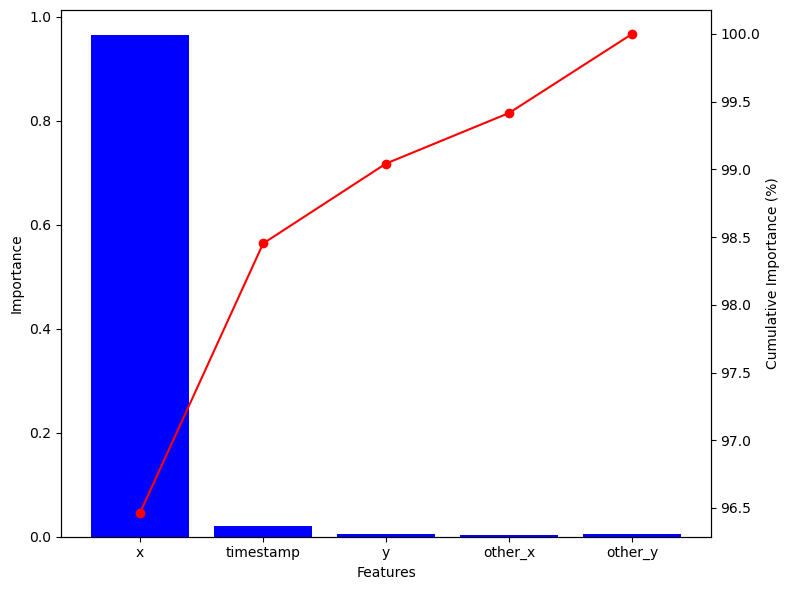

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names
feature_names = ['x', 'timestamp', 'y', 'other_x', 'other_y']

# Feature importance values
importance_values = [9.646551e-01, 1.987185e-02, 5.904182e-03, 3.733280e-03, 5.833843e-03]

# Calculate the cumulative sum of the feature importance values
cumulative_importance = np.cumsum(importance_values)

# Calculate the percentage of total importance
total_importance = cumulative_importance[-1]
percentage_importance = (cumulative_importance / total_importance) * 100

# Set the figure size
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for feature importance
ax1.bar(feature_names, importance_values, color='blue')
ax1.set_xlabel('Features')
ax1.set_ylabel('Importance')

# Twin x-axis for cumulative importance
ax2 = ax1.twinx()
ax2.plot(feature_names, percentage_importance, color='red', marker='o')
ax2.set_ylabel('Cumulative Importance (%)')

# Set x-axis labels rotation for better readability
plt.xticks(rotation=90)

# Adjust plot layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



Mean Squared Error: 503.1656721958234
R-squared: 0.8025142600573085


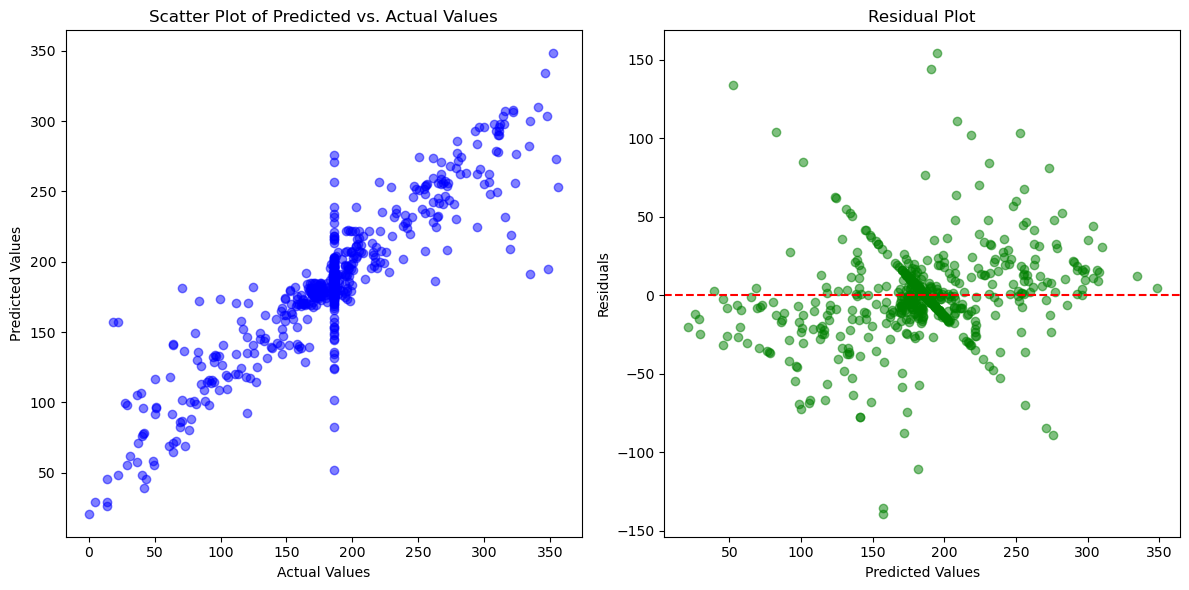

In [198]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the tracks.csv file
data = pd.read_csv('tracks.csv')

# Select the desired features
features = ['timestamp', 'x', 'y']
X = data[features]
y = data['head_yaw']  # Target variable - predicting the future head yaw position

# Preprocess the data
# Handle missing values in input features
X = X.replace('None', np.nan)
X = X.fillna(X.mean())
X['timestamp'] = X['timestamp'].replace('None', -9999)
X = X.fillna(-9999)
X = X.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Convert target variable to numeric type
y = pd.to_numeric(y, errors='coerce')

# Handle missing values in the target variable
y = y.fillna(y.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model with modified hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Residual plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, c='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


Mean Squared Error: 461.05065618261494
R-squared: 0.8190438358206367


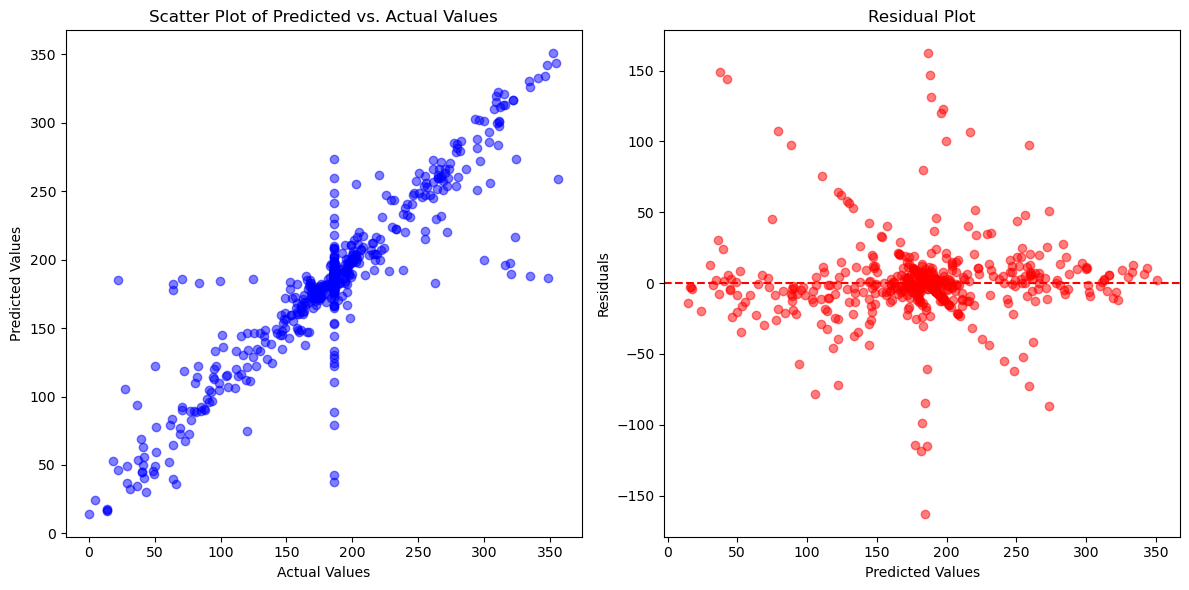

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading the tracks file 
data = pd.read_csv('tracks.csv')

# Select the desired features
features = ['timestamp', 'x', 'y']
X = data[features]
y = data['head_yaw']  # Target variable - predicting the future head yaw position

# Preprocess the data
# Handle missing values in input features
X = X.replace('None', np.nan)
X = X.fillna(X.mean())
X['timestamp'] = X['timestamp'].replace('None', -9999)
X = X.fillna(-9999)
X = X.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Convert target variable to numeric type
y = pd.to_numeric(y, errors='coerce')

# Handle missing values in the target variable
y = y.fillna(y.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the Gradient Boosting Regressor model with modified hyperparameters
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=9, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create scatter plot of predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Create residual plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, c='red', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()



Mean Squared Error: 699.7102816467512
R-squared: 0.7253731517226014


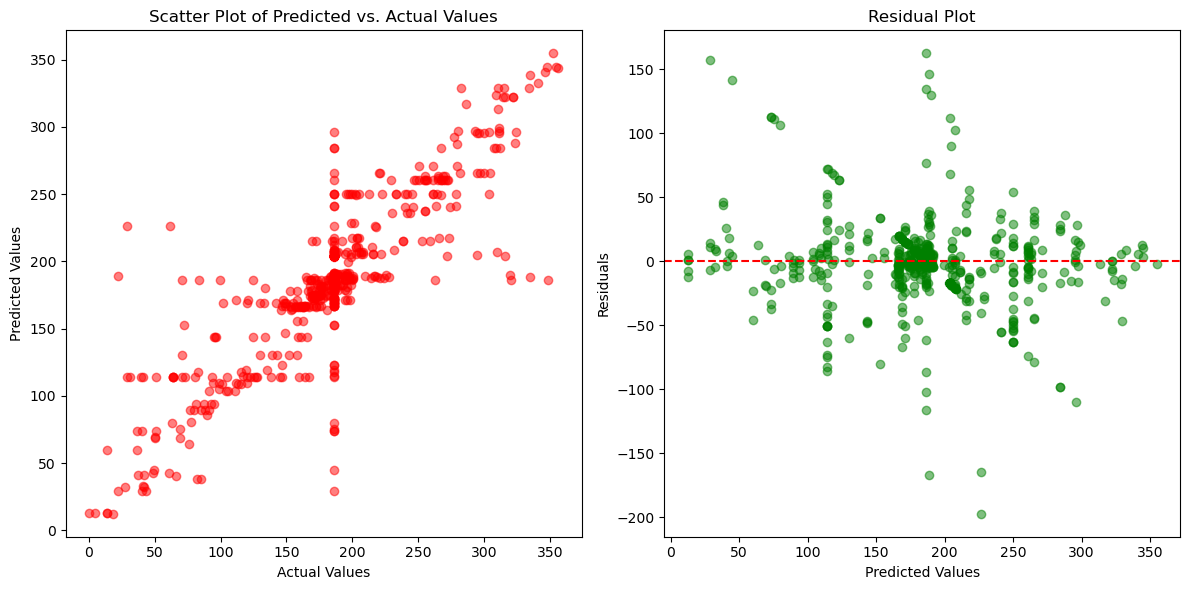

In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the tracks.csv file
data = pd.read_csv('tracks.csv')

# Selected the features which are most influential
features = ['timestamp', 'x', 'y']
X = data[features]
y = data['head_yaw']  # Target variable - predicting the future head yaw position

# Preprocessing the data
# Handling the missing values in input features
X = X.replace('None', np.nan)
X = X.fillna(X.mean())
X['timestamp'] = X['timestamp'].replace('None', -9999)
X = X.fillna(-9999)
X = X.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Convert target variable to numeric type
y = pd.to_numeric(y, errors='coerce')

# Handle missing values in the target variable
y = y.fillna(y.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the Decision Tree Regressor model with optimized hyperparameters
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=6, min_samples_leaf=1, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='red', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Residual plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, c='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [190]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the tracks.csv file
data = pd.read_csv('tracks.csv')

# Select the desired features
features = ['timestamp', 'x', 'y']
X = data[features]
y = data['head_yaw']  # Target variable - predicting the future head yaw position

# Preprocess the data
# Handle missing values in input features
X = X.replace('None', np.nan)
X = X.fillna(X.mean())
X['timestamp'] = X['timestamp'].replace('None', -9999)
X = X.fillna(-9999)
X = X.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Convert target variable to numeric type
y = pd.to_numeric(y, errors='coerce')

# Handle missing values in the target variable
y = y.fillna(y.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the models
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=9, random_state=42)
gb_regressor.fit(X_train, y_train)

dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=6, min_samples_leaf=1, random_state=42)
dt_regressor.fit(X_train, y_train)

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_regressor.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the models
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create the table
data = {
    'Model': ['Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'Mean Squared Error': [mse_gb, mse_dt, mse_rf],
    'R-squared': [r2_gb, r2_dt, r2_rf]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


               Model  Mean Squared Error  R-squared
0  Gradient Boosting          461.050656   0.819044
1      Decision Tree          699.710282   0.725373
2      Random Forest          503.165672   0.802514
